# Project: Write a Blog post about Airbnb-Data from Boston and Seattle

### by Laura Hagg

### Neccessary imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

### Settings:

In [2]:
#set the colors for the plots
boston_color=sb.color_palette()[0]
seattle_color=sb.color_palette()[1]

#function for the labels of the plots
def graph_labels(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

## Steps:
1. Gather
2. Assess
3. Clean
4. Analyzse
5. Model
6. Visualize

## 1. Gather

### Boston: Load the data

In [3]:
boston = pd.read_csv('boston_listings.csv')
boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


### Seattle: Load the data

In [4]:
seattle=pd.read_csv('seattle_listings.csv')
seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## 2. Assess

### Boston:

In [5]:
boston.shape

(3585, 95)

In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [7]:
boston.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [8]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3585.0,8.440875e+06,4.500787e+06,3.353000e+03,4.679319e+06,8.577620e+06,1.278953e+07,1.493346e+07
scrape_id,3585.0,2.016091e+13,8.516813e-01,2.016091e+13,2.016091e+13,2.016091e+13,2.016091e+13,2.016091e+13
host_id,3585.0,2.492311e+07,2.292781e+07,4.240000e+03,6.103425e+06,1.928100e+07,3.622147e+07,9.385411e+07
host_listings_count,3585.0,5.890237e+01,1.711197e+02,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.490000e+02
host_total_listings_count,3585.0,5.890237e+01,1.711197e+02,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,7.490000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,3585.0,4.234003e+01,2.440255e-02,4.223594e+01,4.232999e+01,4.234520e+01,4.235469e+01,4.238998e+01
longitude,3585.0,-7.108482e+01,3.156464e-02,-7.117179e+01,-7.110508e+01,-7.107843e+01,-7.106215e+01,-7.100010e+01
accommodates,3585.0,3.041283e+00,1.778929e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,3571.0,1.221647e+00,5.014871e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00


### Seattle:

In [9]:
seattle.shape

(3818, 92)

In [10]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [11]:
seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## 3. Clean

### Boston:

In [12]:
#Change the datatype from the column 'price' from object to float
boston.price=boston.price.replace('\$|,', '', regex=True).astype(float)

In [13]:
# Remove the outliers in the price column
boston=boston[boston['price']<3000]

In [14]:
#Remove the columns that are not in the Seattledataframe
boston = boston.drop(['access', 'interaction', 'house_rules'], axis=1)

### Seattle:

In [15]:
seattle.price=seattle.price.replace('\$|,', '', regex=True).astype(float)

### Create and prepare (clean) new dataframes for the analysis:

- boston_price: To analyze the relationship betweern the price and the property/room type and the number of bathrooms and bedrooms

- seattle_price:

### boston_price

In [16]:
#Create a Dataframe with the price, the property type, room type and the number of bedrooms and bathrooms
boston_price = boston[['price','property_type', 'room_type','bathrooms', 'bedrooms']]
boston_price.head()

,price,property_type,room_type,bathrooms,bedrooms
0,250.0,House,Entire home/apt,1.5,2.0
1,65.0,Apartment,Private room,1.0,1.0
2,65.0,Apartment,Private room,1.0,1.0
3,75.0,House,Private room,1.0,1.0
4,79.0,House,Private room,1.5,1.0


In [17]:
#Check the NaNs. Remove them if there are only a few missing values
boston_price.isna().sum()

price             0
property_type     3
room_type         0
bathrooms        14
bedrooms         10
dtype: int64

In [18]:
#Remove the NaNs
boston_price=boston_price.dropna(axis=0)

### seatte_price

In [19]:
#Create a Dataframe with the price, the property type, room type and the number of bedrooms and bathrooms
seattle_price = seattle[['price','property_type', 'room_type','bathrooms', 'bedrooms']]
seattle_price.head()

,price,property_type,room_type,bathrooms,bedrooms
0,85.0,Apartment,Entire home/apt,1.0,1.0
1,150.0,Apartment,Entire home/apt,1.0,1.0
2,975.0,House,Entire home/apt,4.5,5.0
3,100.0,Apartment,Entire home/apt,1.0,0.0
4,450.0,House,Entire home/apt,2.0,3.0


In [20]:
#Check the NaNs. Remove them if there are only a few missing values
seattle_price.isna().sum()

price             0
property_type     1
room_type         0
bathrooms        16
bedrooms          6
dtype: int64

In [21]:
#Remove the NaNs
seattle_price=seattle_price.dropna(axis=0)

### boston_reviews

In [22]:
#create a dataframe with the number of reviews and the review scores
boston_reviews = boston[['number_of_reviews','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]
boston_reviews.head()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0
3,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0


In [23]:
boston_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3583 entries, 0 to 3584
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            3583 non-null   int64  
 1   review_scores_rating         2772 non-null   float64
 2   review_scores_accuracy       2762 non-null   float64
 3   review_scores_cleanliness    2767 non-null   float64
 4   review_scores_checkin        2765 non-null   float64
 5   review_scores_communication  2767 non-null   float64
 6   review_scores_location       2763 non-null   float64
 7   review_scores_value          2764 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 251.9 KB


In [24]:
#create a dataframe with no reviews
no_boston_reviews = boston_reviews.query('number_of_reviews ==0')
no_boston_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 3584
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            754 non-null    int64  
 1   review_scores_rating         0 non-null      float64
 2   review_scores_accuracy       0 non-null      float64
 3   review_scores_cleanliness    0 non-null      float64
 4   review_scores_checkin        0 non-null      float64
 5   review_scores_communication  0 non-null      float64
 6   review_scores_location       0 non-null      float64
 7   review_scores_value          0 non-null      float64
dtypes: float64(7), int64(1)
memory usage: 53.0 KB


Conclusion: Most of the NaNs are from the Airbnbs without reviews. For later analysis and datamodelling it is neccessary to clean the NaNs from the boston_review dataframe.

In [25]:
#remove the rows with no reviews from the boston_reviews dataframe, because they have a lot of NaNs
#remove the rest of the NaNs
boston_reviews_clean = boston_reviews[boston_reviews['number_of_reviews']!=0]
boston_reviews_clean = boston_reviews_clean.dropna(axis=0)
boston_reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2757 entries, 1 to 3583
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            2757 non-null   int64  
 1   review_scores_rating         2757 non-null   float64
 2   review_scores_accuracy       2757 non-null   float64
 3   review_scores_cleanliness    2757 non-null   float64
 4   review_scores_checkin        2757 non-null   float64
 5   review_scores_communication  2757 non-null   float64
 6   review_scores_location       2757 non-null   float64
 7   review_scores_value          2757 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 193.9 KB


### seattle_reviews

In [26]:
#create a dataframe with the number of reviews and the review scores
seattle_reviews = seattle[['number_of_reviews','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]
seattle_reviews.head()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [27]:
seattle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            3818 non-null   int64  
 1   review_scores_rating         3171 non-null   float64
 2   review_scores_accuracy       3160 non-null   float64
 3   review_scores_cleanliness    3165 non-null   float64
 4   review_scores_checkin        3160 non-null   float64
 5   review_scores_communication  3167 non-null   float64
 6   review_scores_location       3163 non-null   float64
 7   review_scores_value          3162 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 238.8 KB


In [28]:
#create a dataframe with no reviews
no_seattle_reviews = seattle_reviews.query('number_of_reviews ==0')
no_seattle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 3 to 3817
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            627 non-null    int64  
 1   review_scores_rating         0 non-null      float64
 2   review_scores_accuracy       0 non-null      float64
 3   review_scores_cleanliness    0 non-null      float64
 4   review_scores_checkin        0 non-null      float64
 5   review_scores_communication  0 non-null      float64
 6   review_scores_location       0 non-null      float64
 7   review_scores_value          0 non-null      float64
dtypes: float64(7), int64(1)
memory usage: 44.1 KB


In [29]:
#remove the rows with no reviews from the boston_reviews dataframe, because they have a lot of NaNs
#remove the rest of the NaNs
seattle_reviews_clean = seattle_reviews[seattle_reviews['number_of_reviews']!=0]
seattle_reviews_clean = seattle_reviews_clean.dropna(axis=0)
seattle_reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 0 to 3814
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            3158 non-null   int64  
 1   review_scores_rating         3158 non-null   float64
 2   review_scores_accuracy       3158 non-null   float64
 3   review_scores_cleanliness    3158 non-null   float64
 4   review_scores_checkin        3158 non-null   float64
 5   review_scores_communication  3158 non-null   float64
 6   review_scores_location       3158 non-null   float64
 7   review_scores_value          3158 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 222.0 KB


## 4. Analyze

### Questions:

Question 1: What are the differences in the price, the number of rooms and the property and room type in Seattle and Boston?

Question 2: Which airbnbs have the most and the best reviews - Boston or Seattle?

Question 3: Is there a correlation between the price and the number of bed- and bathrooms? (Data Modelling)

Question 4: Is there are correlation between the property or room type of the airbnb and its rating? (Data Modelling)



### Question 1: What are the differences in the price, the number of rooms and the property and room type in Seattle and Boston?

#### Analyzing the distriution of the price and the types and number of rooms

In [30]:
boston_price.describe()

,price,bathrooms,bedrooms
count,3556.000000,3556.000000,3556.000000
mean,172.159168,1.222300,1.257030
std,125.553530,0.502181,0.754373
min,10.000000,0.000000,0.000000
25%,85.000000,1.000000,1.000000
50%,150.000000,1.000000,1.000000
75%,220.000000,1.000000,2.000000
max,1400.000000,6.000000,5.000000


In [31]:
seattle_price.describe()

,price,bathrooms,bedrooms
count,3795.000000,3795.000000,3795.000000
mean,128.042688,1.259947,1.308037
std,90.433865,0.590808,0.884903
min,20.000000,0.000000,0.000000
25%,75.000000,1.000000,1.000000
50%,100.000000,1.000000,1.000000
75%,150.000000,1.000000,2.000000
max,1000.000000,8.000000,7.000000


### Conclusion:
The airbnbs in Bosten are more expensive than in Seattle (mean: 172 vs. 128), though the Seattle airbnbs have more bath- and bedrooms according to the mean.

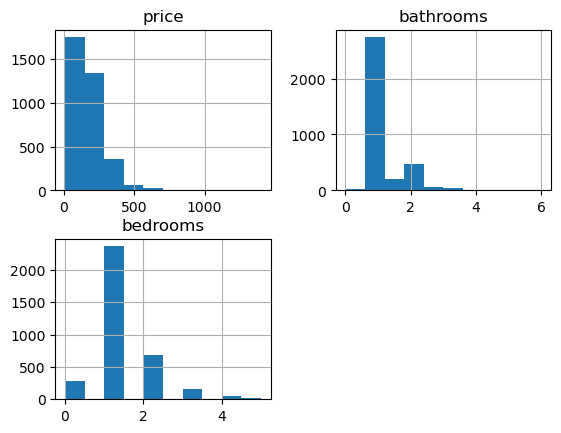

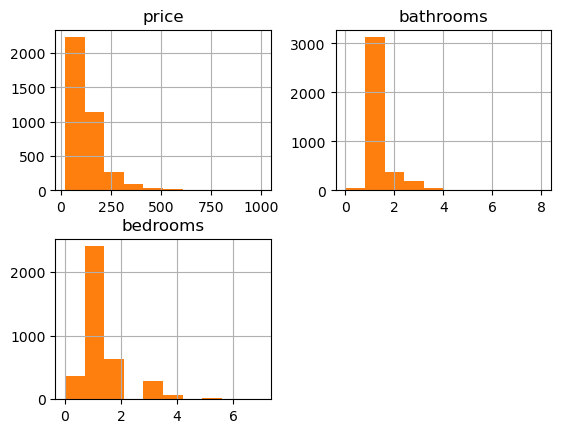

In [32]:
boston_price.hist()
seattle_price.hist(color=seattle_color);

#### Explore the property types in Boston and Seattle

In [33]:
boston_price.property_type.value_counts()

Apartment          2593
House               557
Condominium         231
Townhouse            54
Bed & Breakfast      39
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [34]:
seattle_price.property_type.value_counts()

House              1723
Apartment          1698
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Cabin                21
Other                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Yurt                  1
Chalet                1
Name: property_type, dtype: int64

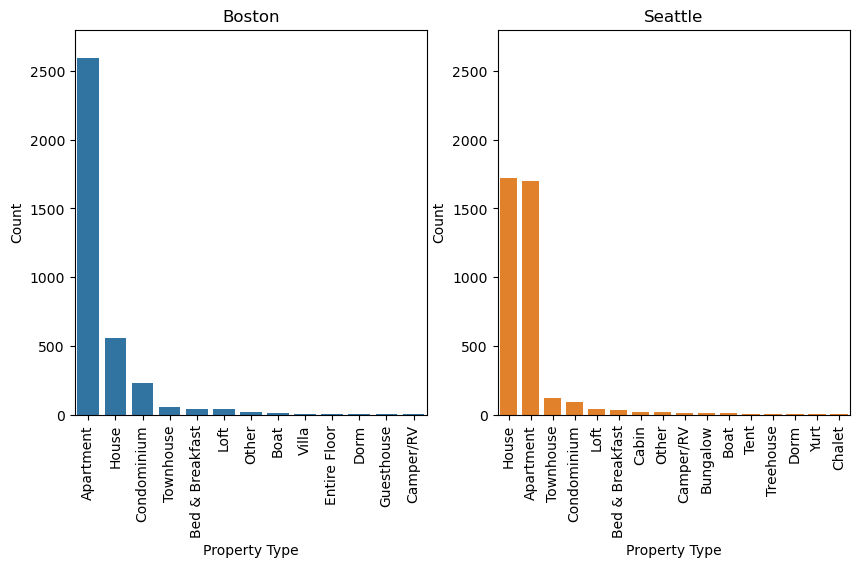

In [35]:
#barplot of the property types

plt.figure(figsize=[10,5])


plt.subplot(1,2,1)
sb.countplot(data=boston_price, x='property_type', color=boston_color, order=boston_price['property_type'].value_counts().index)
plt.xticks(rotation=90)
plt.ylim(0,2800)
graph_labels('Boston', 'Property Type', 'Count')

plt.subplot(1,2,2)
sb.countplot(data=seattle_price, x='property_type', color=seattle_color, order=seattle_price['property_type'].value_counts().index)
plt.xticks(rotation=90)
plt.ylim(0,2800)
graph_labels('Seattle', 'Property Type', 'Count');

#### conclusion:
The most airbnbs in Boston are appartments.

In Seattle there are a lot of appartments, too, but the most common proprty type are houses. One interesting fact: In Seattle they rent Treehouses, tents and yurts. They also rent more campers than in Boston.

#### Explore the room types in Boston and Seattle

In [36]:
boston_price.room_type.value_counts()

Entire home/apt    2109
Private room       1368
Shared room          79
Name: room_type, dtype: int64

In [37]:
seattle_price.room_type.value_counts()

Entire home/apt    2525
Private room       1153
Shared room         117
Name: room_type, dtype: int64

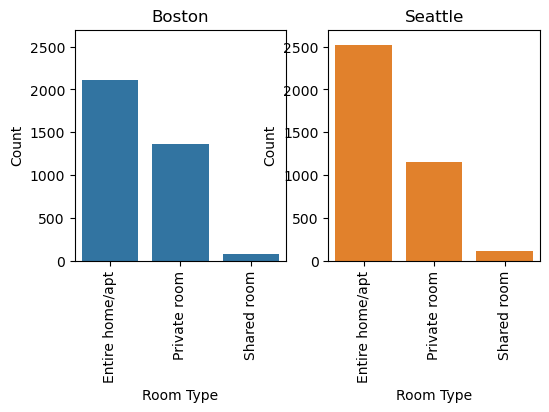

In [38]:
#barplot of the roomtypes
plt.figure(figsize=[6,3])


plt.subplot(1,2,1)
sb.countplot(data=boston_price, x='room_type', color=boston_color)
plt.xticks(rotation=90)
plt.ylim(0,2700)
graph_labels('Boston', 'Room Type', 'Count')

plt.subplot(1,2,2)
sb.countplot(data=seattle_price, x='room_type', color=seattle_color)
plt.xticks(rotation=90)
plt.ylim(0,2700)
graph_labels('Seattle', 'Room Type', 'Count');

#### conclusion:
In both cities we have a similar distribution of the room types: most common are entire homes, on the second place are the private rooms and last are the shared rooms.

#### Context betweern the price and the roomtype in Boston and Seattle

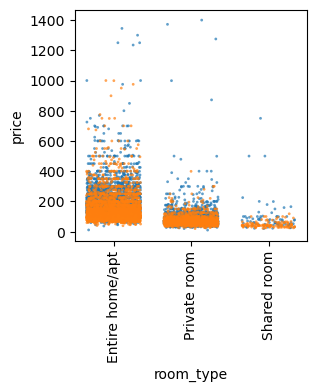

In [39]:
#plot a stripplot
plt.figure(figsize=[3,3])
ax = sb.stripplot(data=boston_price,x='room_type', y='price', color=boston_color, dodge=True, jitter=0.35, size=2, alpha=.7)
sb.stripplot(data=seattle_price,ax=ax, x='room_type', y='price', color=seattle_color, dodge=True, jitter=0.35, size=2, alpha=.7)
plt.xticks(rotation=90);

#### Conclusion:

As in the distribution of the property type seen yet, on Boston are more expensive airbnbs than in Seattle.

#### Explore the relationship between price and number of bathrooms and bedrooms in Boston and Seattle

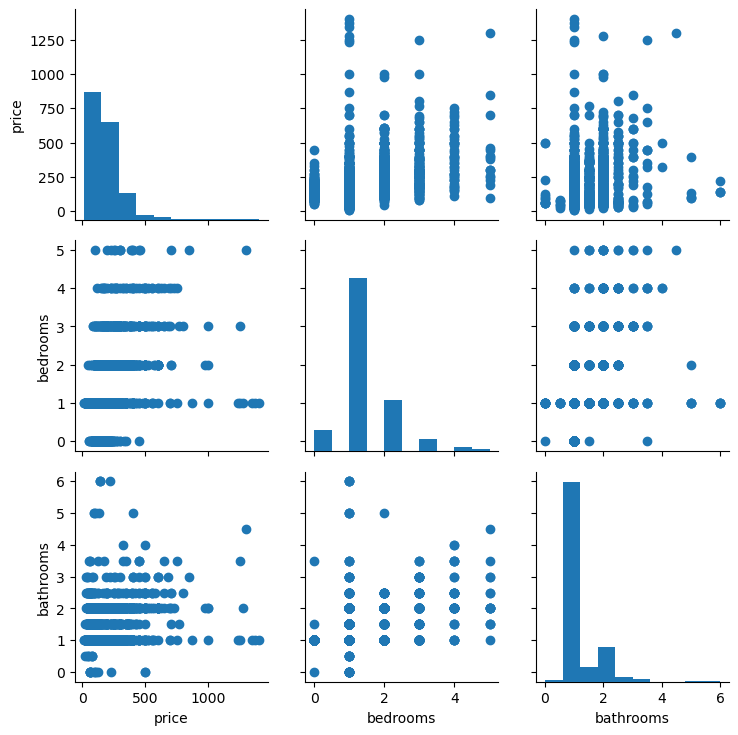

In [40]:
#Scatterplot with the price and the number of rooms in Boston
g= sb.PairGrid(data=boston_price, vars=['price', 'bedrooms', 'bathrooms'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

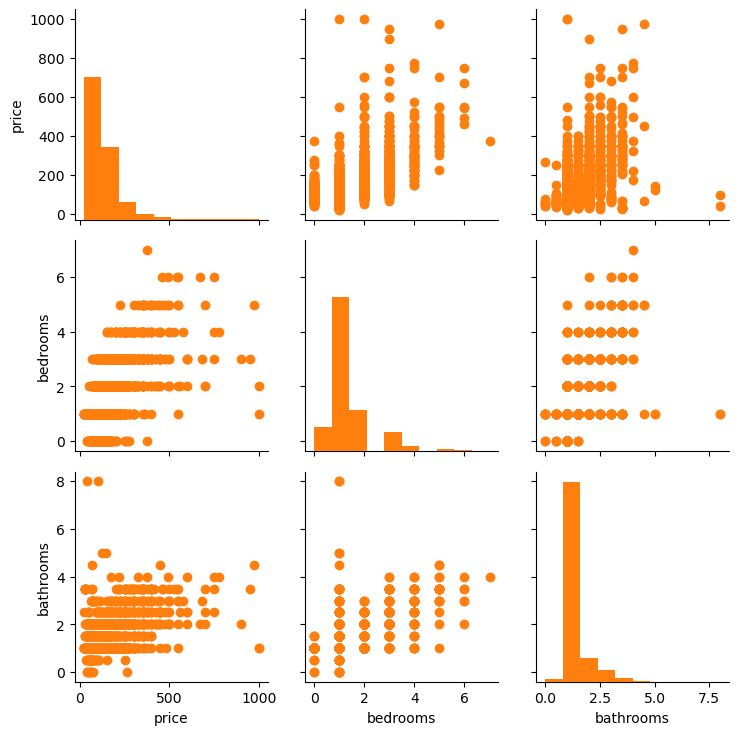

In [41]:
#Scatterplot with the price and the number of rooms in Seattle
g= sb.PairGrid(data=seattle_price, vars=['price', 'bedrooms', 'bathrooms'])
g.map_diag(plt.hist, color=seattle_color)
g.map_offdiag(plt.scatter, color=seattle_color);

#### Conclusion:
On the first view there might be a correlation between the number of bedrooms and the price: It seems, that the price increases when the airbnb hat more bedrooms. you can see this phenomen in Boston and in Seattle as well. On this point are further investigation neccessary, to verify this relationsship.

The relationsship betweern price and the number of bathrooms is not that obviously with visual exploration, but maybe there is an correlation, too!?

### Question 2: Which airbnbs have the most and the best reviews - Boston or Seattle?

#### Analyzing the distribution of the reviews and their scores

In [42]:
boston_reviews_clean.describe()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000
mean,24.733769,91.905332,9.431266,9.258252,9.645267,9.646717,9.413493,9.168299
std,38.797830,9.534299,0.932058,1.169602,0.763621,0.735257,0.903673,1.009733
min,1.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
25%,3.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,10.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,29.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [43]:
#proportion of the reviews in Boston
prop_rev_boston = 100* boston_reviews_clean['number_of_reviews'].count()/boston_reviews['number_of_reviews'].count()
print('{:.2f} % of the airbnbs in Boston are reviewed'.format(prop_rev_boston))

76.95 % of the airbnbs in Boston are reviewed


In [44]:
seattle_reviews_clean.describe()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,26.856555,94.538949,9.636795,9.556048,9.786574,9.810956,9.608930,9.452185
std,39.962629,6.597547,0.697614,0.797442,0.595663,0.559464,0.628746,0.750099
min,1.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000
25%,4.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,13.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,32.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [45]:
#proportion of the reviews in Seattle
prop_rev_seattle = 100* seattle_reviews_clean['number_of_reviews'].count()/seattle_reviews['number_of_reviews'].count()
print('{0:.2f} % of the airbnbs in Seattle are reviewed'.format(prop_rev_seattle))

82.71 % of the airbnbs in Seattle are reviewed


#### Conclusion:
In Seattle are more airbnbs reviewed than in Boston (83% vs. 77%) and the means of review scores in Seattle are higher than in Boston.

## 5. Data Modelling

### Question 3: Is there a correlation between the price and the number of bed- and bathrooms?

First i write three functions for a linear regression model, to predict the price depending on the number of bed- and bathrooms

In [46]:
#function to predict the price
def predicting_price(data):
    X=data[['bathrooms', 'bedrooms']]
    y=data['price']

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
    lm_model=LinearRegression()
    lm_model.fit(X_train, y_train)
    y_test_preds=lm_model.predict(X_test)
    r2_test=lm_model.score(X_test, y_test)
    
    return 'The r2 squared for the linear regression is {}.' .format(r2_test)

In [47]:
#function to see the correlation between the price and the bedrooms
def predicting_price_bedrooms(data):
    data['intercept'] = 1
    lm = sm.OLS(data['price'], data[['intercept', 'bedrooms']])
    results=lm.fit()
    return results.summary()


In [48]:
#function to see the correlation between the price and the bathrooms
def predicting_price_bathrooms(data):
    data['intercept'] = 1
    lm = sm.OLS(data['price'], data[['intercept', 'bathrooms']])
    results=lm.fit()
    return results.summary()

#### Boston:

In [49]:
#correlation betweern price and the number of both rooms
predicting_price(boston_price)

'The r2 squared for the linear regression is 0.20923865541370024.'

In [50]:
#correlation betweern price and number of bedrooms
predicting_price_bedrooms(boston_price)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     917.7
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          1.58e-179
Time:                        10:19:46   Log-Likelihood:                -21822.
No. Observations:                3556   AIC:                         4.365e+04
Df Residuals:                    3554   BIC:                         4.366e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     77.3805      3.649     21.208      0.000      70.227      84.534
bedrooms      75.3989      2.489     30.294      0.000      70.519      80.279
==============================================================================
Omnibus:                     2729.977   Durbin-Watson:                   1.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100426.284
Skew:                           3.305   Prob(JB):                         0.00
Kurtosis:                      28.181   Cond. No.                         3.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#correlation betweern price and number of bathrooms
predicting_price_bathrooms(boston_price)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     323.4
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.88e-69
Time:                        10:19:46   Log-Likelihood:                -22076.
No. Observations:                3556   AIC:                         4.416e+04
Df Residuals:                    3554   BIC:                         4.417e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     83.9066      5.306     15.815      0.000      73.504      94.309
bathrooms     72.2020      4.015     17.982      0.000      64.330      80.074
==============================================================================
Omnibus:                     2343.691   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57188.130
Skew:                           2.756   Prob(JB):                         0.00
Kurtosis:                      21.857   Cond. No.                         5.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Seattle:

In [52]:
#correlation betweern price and the number of both rooms
predicting_price(seattle_price)

'The r2 squared for the linear regression is 0.4280325143290581.'

In [53]:
#correlation betweern price and number of bedrooms
predicting_price_bedrooms(seattle_price)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     2473.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        10:19:46   Log-Likelihood:                -21527.
No. Observations:                3795   AIC:                         4.306e+04
Df Residuals:                    3793   BIC:                         4.307e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     44.0619      2.039     21.612      0.000      40.065      48.059
bedrooms      64.2037      1.291     49.731      0.000      61.673      66.735
==============================================================================
Omnibus:                     2807.132   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95704.985
Skew:                           3.151   Prob(JB):                         0.00
Kurtosis:                      26.781   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#correlation betweern price and number of bathrooms
predicting_price_bathrooms(seattle_price)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1380.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          6.74e-258
Time:                        10:19:46   Log-Likelihood:                -21891.
No. Observations:                3795   AIC:                         4.379e+04
Df Residuals:                    3793   BIC:                         4.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     28.4324      2.962      9.601      0.000      22.626      34.239
bathrooms     79.0591      2.128     37.148      0.000      74.887      83.232
==============================================================================
Omnibus:                     2166.812   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63590.520
Skew:                           2.176   Prob(JB):                         0.00
Kurtosis:                      22.576   Cond. No.                         4.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#create a dataframe with all the r2-values
r_squared = pd.DataFrame({'Bedrooms': [0.205, 0.395],
                        'Bathrooms': [0.083, 0.267],
                        'Both Rooms': [0.209, 0.428]},
                        index=['Boston', 'Seattle'])
r_squared

,Bedrooms,Bathrooms,Both Rooms
Boston,0.205,0.083,0.209
Seattle,0.395,0.267,0.428


#### Conclusion:
The correlation between the number of rooms and the price has a small r2, that means there is only a weak correlation betweern these values. But the correlation for bedrooms is stronger than for bathrooms. And in Seattle the number of rooms hat a higher influence on the price, because r2 is bigger.

### Question 4: Is there are correlation between the property or room type of the airbnb and its rating?

In [56]:
#function to predict the rating
def predicting_rating(data):
    
    # Drop the rows with no rating
    data=data.dropna(subset=['review_scores_rating'], axis=0)
    y=data['review_scores_rating']
    
    #Remove uneccessary columns
    data = data.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month'], axis=1)
    
    # Create dummy variables for the columns with categorival values
    cat_cols = data[['property_type', 'room_type']]
    for col in cat_cols:
        data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
 

    X=data
   
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
    lm_model=LinearRegression()
    lm_model.fit(X_train, y_train)
    
    y_test_preds=lm_model.predict(X_test)
    r2_test=lm_model.score(X_test, y_test)
    
    return 'The r2 squared for the linear regression is {}.' .format(r2_test)

In [57]:
#run the function for Boston
predicting_rating(boston)

'The r2 squared for the linear regression is -0.010691993708481728.'

In [58]:
# run the function for Seattle
predicting_rating(seattle)

'The r2 squared for the linear regression is 0.001116031852610111.'

#### Conclusion:
The R squared values are nearly 0, that means there is no linear correlation between the rating and the property/room type of the airbnb.

## 6. Visualisations

#### Stripplpot:
Here you can see the distribution of the property type and the price in Seattle and Boston.

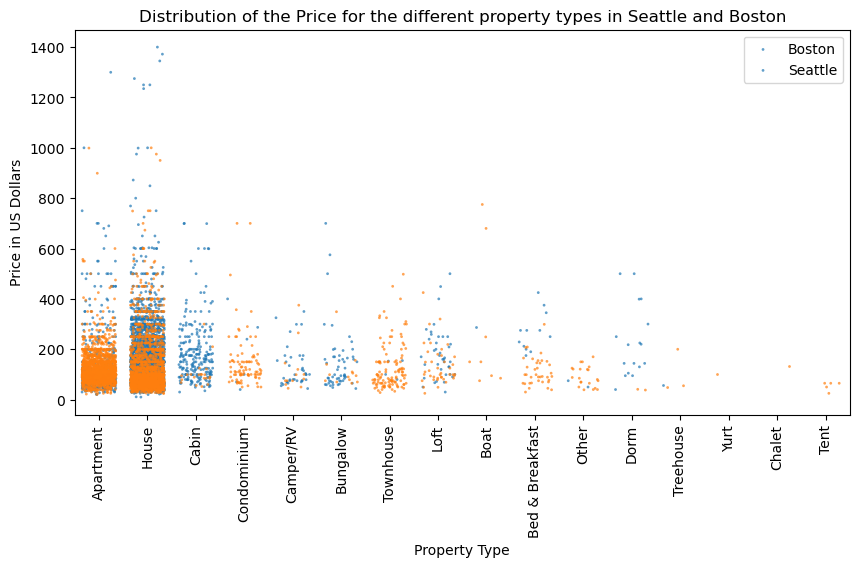

In [59]:
plt.figure(figsize=[10,5])
ax = sb.stripplot(data=boston_price,x='property_type', y='price', color=boston_color, dodge=True, jitter=0.35, size=2, alpha=.7)
ax2= sb.stripplot(data=seattle_price,ax=ax, x='property_type', y='price', color=seattle_color, dodge=True, jitter=0.35, size=2, alpha=.7)
plt.xticks(rotation=90)
ax.legend(['Boston', 'Seattle'])
graph_labels('Distribution of the Price for the different property types in Seattle and Boston', 'Property Type', 'Price in US Dollars');

#### Conclusion:
On the first view you can see, that there are more expensive airbnbs in Boston than in Seattle.

#### Barplots: 
Here you can see the difference in the ratings bewteen Boston and Seattle

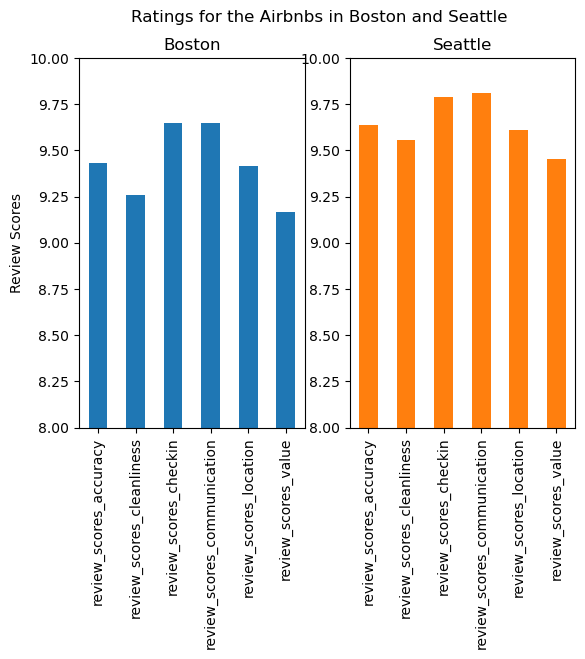

In [60]:
#barplots to see the difference in the means of the ratings in Boston and Seattle
plt.subplot(1,2,1)
boston_reviews_clean[['review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']].mean().plot(kind='bar', color=boston_color)
plt.ylim(8,10)
plt.title('Boston')
plt.ylabel('Review Scores')

plt.subplot(1,2,2)
seattle_reviews_clean[['review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']].mean().plot(kind='bar', color=seattle_color)
plt.ylim(8,10)
plt.title('Seattle')

plt.suptitle('Ratings for the Airbnbs in Boston and Seattle');

#### Conlcusion:
Here you can see, that the Means of the  Ratings  in Seattle are higher than in Boston.

#### Scatterplots:
Here you can see the correlation betweern the number of rooms and the price of the airbnbs.

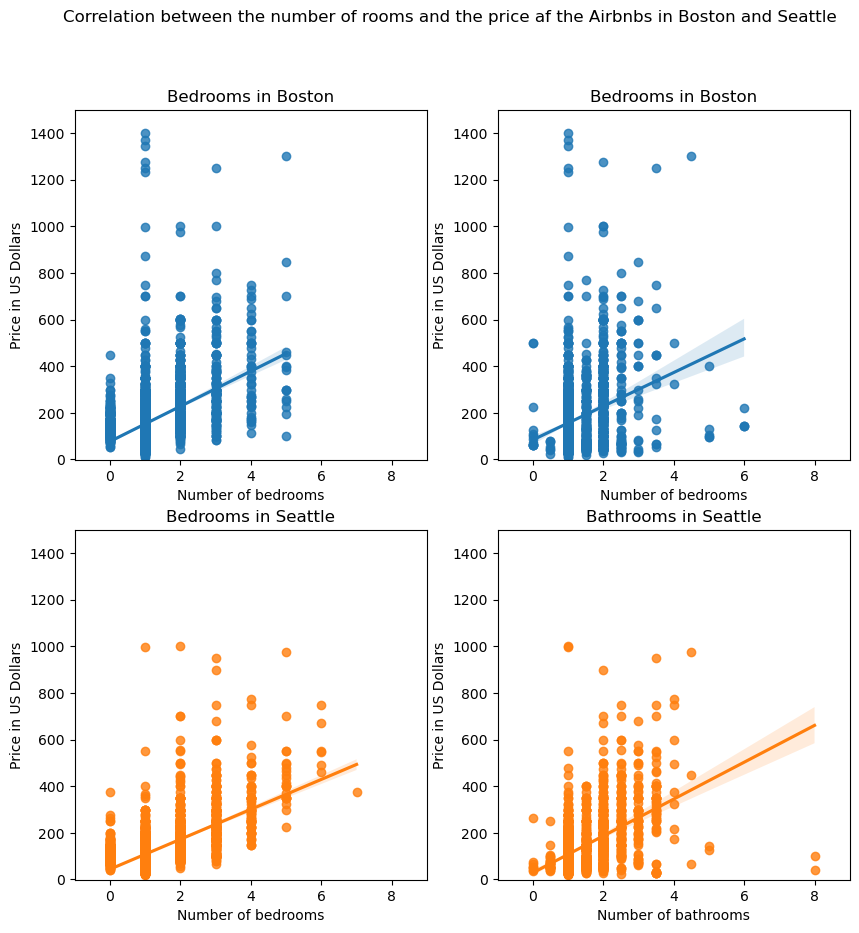

In [61]:
plt.figure(figsize=[10,10])


plt.subplot(2,2,1)
sb.regplot(data=boston_price, x='bedrooms', y='price')
graph_labels('Bedrooms in Boston', 'Number of bedrooms', 'Price in US Dollars')
plt.xlim(-1,9)
plt.ylim(-1,1500)

plt.subplot(2,2,2)
sb.regplot(data=boston_price, x='bathrooms', y='price')
graph_labels('Bedrooms in Boston', 'Number of bedrooms', 'Price in US Dollars')
plt.xlim(-1,9)
plt.ylim(-1,1500)

plt.subplot(2,2,3)
sb.regplot(data=seattle_price, x='bedrooms', y='price', color=seattle_color)
graph_labels('Bedrooms in Seattle', 'Number of bedrooms', 'Price in US Dollars')
plt.xlim(-1,9)
plt.ylim(-1,1500)

plt.subplot(2,2,4)
sb.regplot(data=seattle_price, x='bathrooms', y='price', color=seattle_color)
graph_labels('Bathrooms in Seattle', 'Number of bathrooms', 'Price in US Dollars')
plt.xlim(-1,9)
plt.ylim(-1,1500)

plt.suptitle('Correlation between the number of rooms and the price af the Airbnbs in Boston and Seattle');

#### Conclusion:
Here you can see, that there is a positive correlation between the number of rooms and the price.